<a href="https://colab.research.google.com/github/gweilnid/B222A-OpenSCAD1-Assignment/blob/main/LGG_1_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict):
  message: str

def greeting_node(state: AgentState) -> AgentState:
  """Simple node that adds a greeting message to the state"""
  state['message'] = f"Hello {state['message']}, how is your day going?"
  return state

def compliment_node(state: AgentState) -> AgentState:
  state['message'] = f"{state['message']} You are doing an amazing job learning LangGraph!"
  return state

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.add_node("complimenter", compliment_node)
graph.set_entry_point("greeter")
graph.add_edge("greeter", "complimenter")
graph.set_finish_point("complimenter")

app = graph.compile()

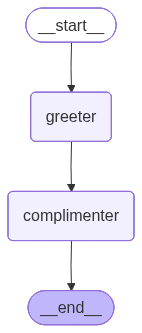

In [ ]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"message": "Bob"})

In [ ]:
result["message"]

'Hello Bob, how is your day going? You are doing an amazing job learning LangGraph!'